# Netflix Data Analysis

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('netflix_titles.csv')

print('imported')

imported


TypeError: Neither the `x` nor `y` variable appears to be numeric.

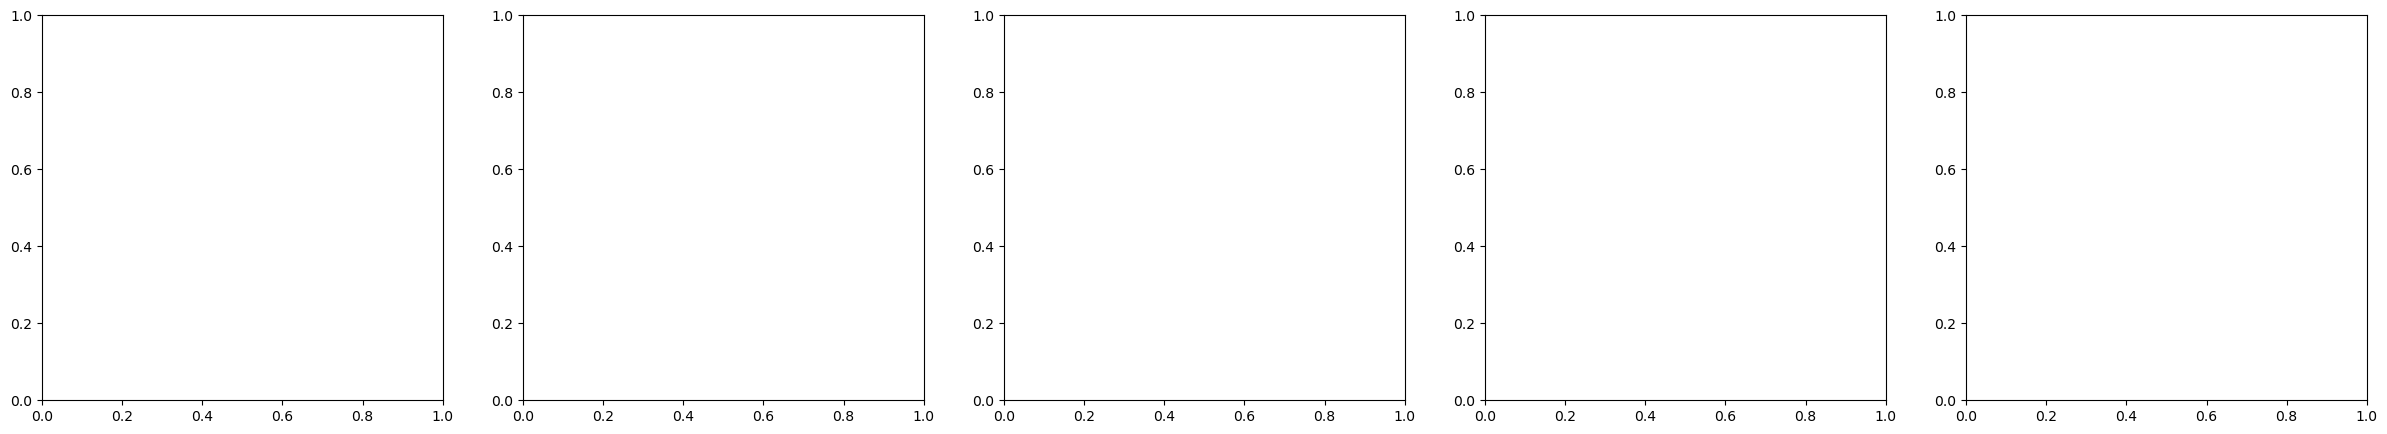

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="type", y="listed_in", hue="duration", data=data, ax=axs[0])
sns.pointplot(x="director", y="type", hue="duration", data=data, ax=axs[1])
sns.pointplot(x="cast", y="type", hue="duration", data=data, ax=axs[2])
sns.pointplot(x="release_year", y="type", hue="duration", data=data, ax=axs[3])
sns.violinplot(x="type", y="date_added", hue="duration", data=data, ax=axs[4])